In [2]:
! pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=c72ee614033df6309c158571fe9baa12a212d4748821536bd734487fd43dfc56
  Stored in directory: c:\users\hmamo\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [ ]:
!conda install python-graphviz

In [3]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

from sklearn.model_selection import train_test_split

In [4]:
# load Occupancy Data

room1 = pd.read_csv("../../Data/datatest.txt", sep = ',', header = 0)
room2 = pd.read_csv("../../Data/datatraining.txt", sep = ',', header = 0)

In [5]:
room = pd.concat([room1, room2])

In [6]:
# View room data

room.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [7]:
# View the last 5 rows of room data

room.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
8143,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [8]:
room.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,10808.0,20.819992,1.078410,19.000000,20.000000,20.700000,21.500000,24.408333
Humidity,10808.0,25.638407,4.953792,16.745000,21.390000,25.680000,28.324167,39.117500
Light,10808.0,137.694088,212.175483,0.000000,0.000000,0.000000,413.541667,1697.250000
CO2,10808.0,634.005070,312.817270,412.750000,441.000000,464.000000,761.000000,2028.500000
HumidityRatio,10808.0,0.003903,0.000803,0.002674,0.003323,0.003805,0.004372,0.006476
Occupancy,10808.0,0.249907,0.432979,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
# Check for missing data
total = room.isnull().sum().sort_values(ascending=False)
print(total)

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


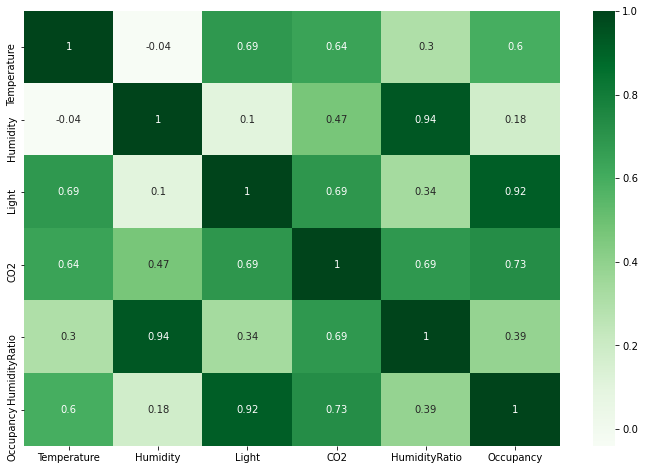

In [10]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(room.corr(), cmap='Greens', annot=True)
plt.show()

In [11]:
# Print correlations of Occupancy response variable
room.corr()[['Occupancy']].sort_values(by='Occupancy',ascending=False)


,Occupancy
Occupancy,1.000000
Light,0.915363
CO2,0.729540
Temperature,0.595005
HumidityRatio,0.386346
Humidity,0.183020


In [12]:
# proportion of occupancy variable
room['Occupancy'].value_counts()

0    8107
1    2701
Name: Occupancy, dtype: int64

In [13]:
features = ['Light', 'CO2', 'Temperature', 'HumidityRatio', 'Humidity']

X = room[features]
y = room['Occupancy']

print(X)
print(y)

           Light         CO2  Temperature  HumidityRatio  Humidity
140   585.200000  749.200000      23.7000       0.004764   26.2720
141   578.400000  760.400000      23.7180       0.004773   26.2900
142   572.666667  769.666667      23.7300       0.004765   26.2300
143   493.750000  774.750000      23.7225       0.004744   26.1250
144   488.600000  779.000000      23.7540       0.004767   26.2000
...          ...         ...          ...            ...       ...
8139  433.000000  787.250000      21.0500       0.005579   36.0975
8140  433.000000  789.500000      21.0500       0.005563   35.9950
8141  433.000000  798.500000      21.1000       0.005596   36.0950
8142  433.000000  820.333333      21.1000       0.005621   36.2600
8143  447.000000  821.000000      21.1000       0.005612   36.2000

[10808 rows x 5 columns]
140     1
141     1
142     1
143     1
144     1
       ..
8139    1
8140    1
8141    1
8142    1
8143    1
Name: Occupancy, Length: 10808, dtype: int64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [19]:
# Create and view decision tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
#img=pltimg.imread('mydecisiontree.png')
#imgplot = plt.imshow(img)
plt.show()

InvocationException: GraphViz's executables not found